# 7.2 Kernel methods in practice
In the current exercise, we will apply the concepts learned about kernel-methods using 4 toy datasets : moons, circles, blobs, and swiss roll. 

__Task__: Using the kernels available in the support vector machine (SVM) implementation found in scikit learn (linear, polynomial, Gaussian, or sigmoid), find the kernel and the corresponding parameter for which SVM achieves the best classification performance. Specifically, experiment with the value of the $\gamma$ parameter, which controls the influence of each of the training samples in the kernel-projection, and therefore, the bias introduced by the kernel used. For further information, see the [scikit learning documentation](http://scikit-learn.org/stable/modules/svm.html#kernel-functions) about the kernels used. Leave the other parameters, as the regularization strength $C$ and the degree of the polynomial kernel fixed.

Here is an example of how $\gamma$ influences the SVM for a Gaussian kernel ([original source](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)). Intuitively, the $\gamma$ parameter defines how far the influence of a single training example reaches, with low values meaning ‘far’ and high values meaning ‘close’.

![caption](gamma_influence.png)

__Hint 1__: Implement a grid search to find the optimal $\gamma$ value for each of the kernels.

__Hint 2__: Don't forget to use an adequate crossvalidation framework to avoid overfitting.

__Q 7.2.1__ For each of the datasets, what is the kernel with which SVM achieves the best classification performance? What is the corresponding $\gamma$ value?

__Answer:__ The kernel achieving the highest perfomance in all the datasets is the gaussian-kernel. The gaussian kernel is standard choice when initially exploring a dataset. Check the plots below for the optimal $\gamma$ value for each of the kernels.

__Task__: For each of the kernels studied above, find the corresponding K-PCA projection using the same kernel parameters. Visualize the achieved projection and compare the result with projects resulting from using different $\gamma$ values.

/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Evaluating: swiss_roll
Kernel: linear
Kernel: rbf
Kernel: poly
Kernel: sigmoid
Evaluating: blobs
Kernel: linear
Kernel: rbf
Kernel: poly
Kernel: sigmoid
Evaluating: circles
Kernel: linear
Kernel: rbf
Kernel: poly
Kernel: sigmoid
Evaluating: moons
Kernel: linear
Kernel: rbf
Kernel: poly
Kernel: sigmoid


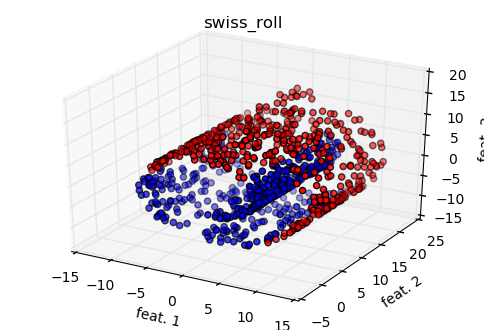

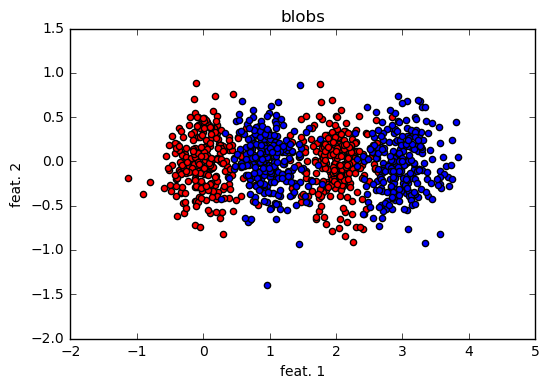

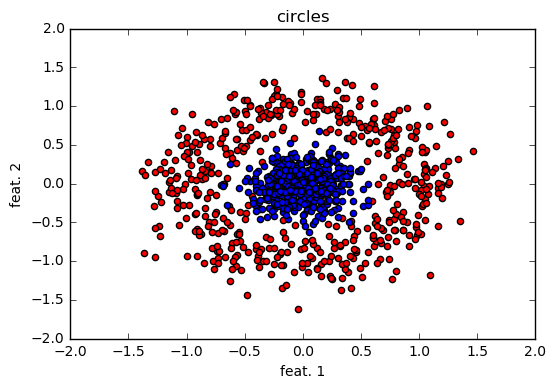

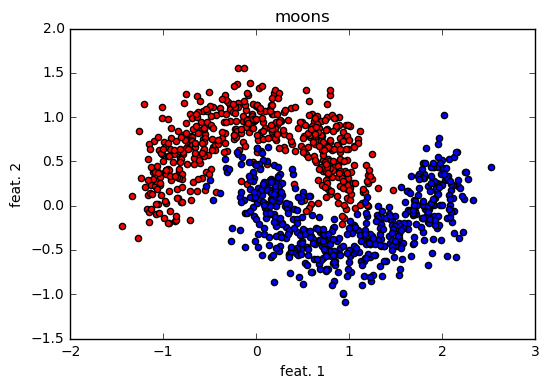

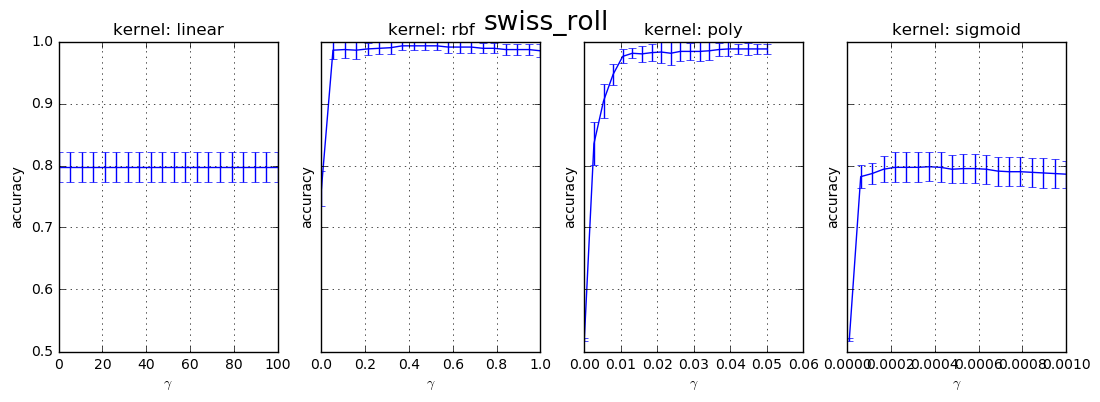

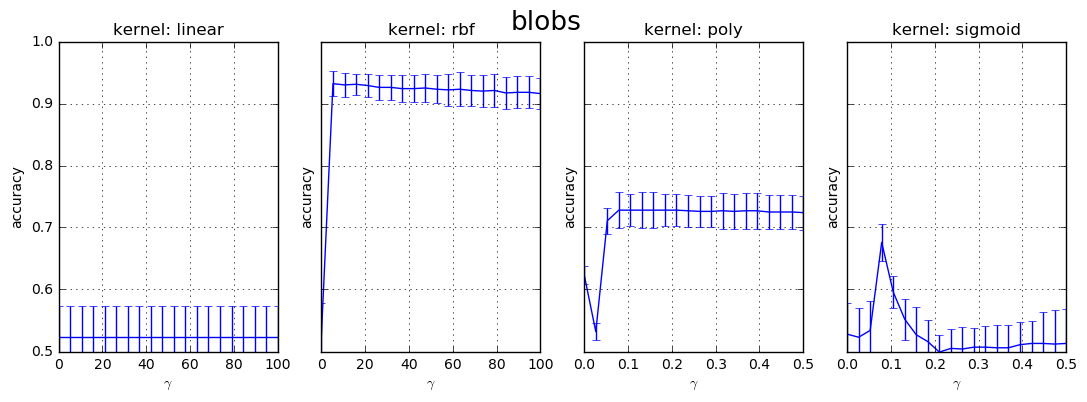

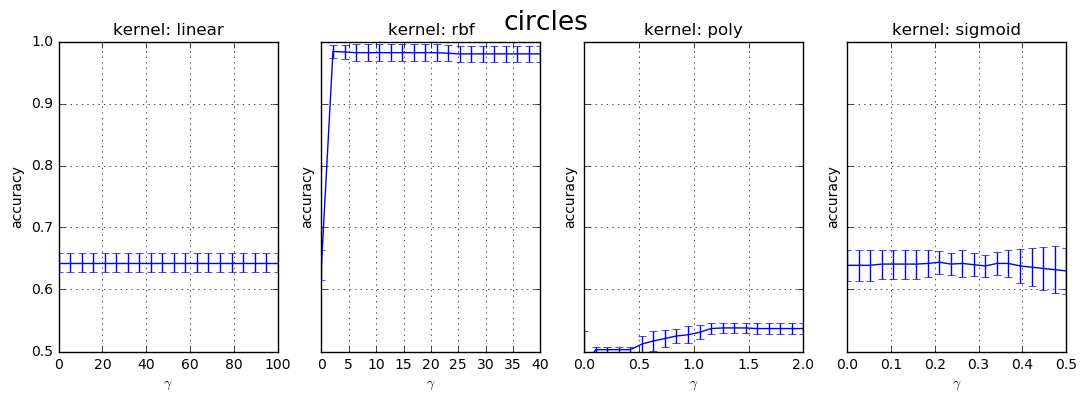

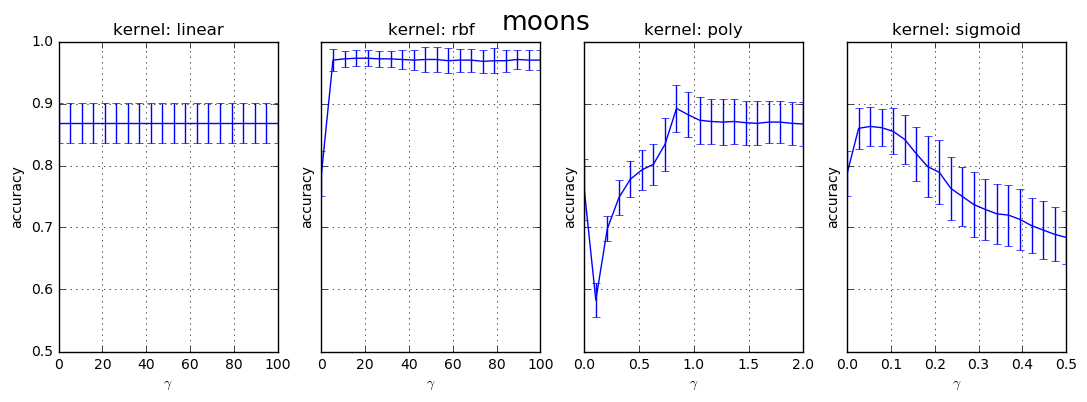

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

from sklearn import datasets
from sklearn import cross_validation
from sklearn.preprocessing import normalize
from sklearn.decomposition import KernelPCA
from sklearn import svm

def scatter_plotDataset(fig,x,y):
    colors = ['r','b']   
    if x.shape[1] == 2:        
        ax = fig.add_subplot(111)
        for idx_class in range(2):
            ax.scatter(x[y==idx_class,0],x[y==idx_class,1],
                     c=colors[idx_class])
    elif x.shape[1] == 3:        
        ax = fig.add_subplot(111, projection='3d')
        for idx_class in range(2):
            cclass = y==idx_class
            ax.scatter(x[cclass,0],x[cclass,1],x[cclass,2],
                     c=colors[idx_class])
            ax.set_zlabel('feat. 3')
    ax.set_xlabel('feat. 1')
    ax.set_ylabel('feat. 2')
    return ax

# load data and visualize it
datasets = {'moons': [],
           'circles': [],
           'blobs': [],
           'swiss_roll': [],}
for key, value in datasets.items():
    fname = os.path.join('datasets',key+'.data')
    x = np.loadtxt(fname)
    fname = os.path.join('datasets',key+'.labels')
    y = np.loadtxt(fname)
    fig = plt.figure()
    ax = scatter_plotDataset(fig,x,y)
    ax.set_title(key)    
    datasets[key] = (x,y)

gamma_ranges = dict()
n_eval = 20 # number of gamma values per interval

# Intervals where the gamma values showed interesting
# behaviour for each kernel and dataset were explored manually
gamma_ranges['moons'] = {'linear': [1e-5,100],
                    'rbf': [1e-5,100],
                    'poly': [1e-5,2],
                    'sigmoid': [1e-5,0.5]}
gamma_ranges['circles'] = { 'linear': [1e-5,100],
                    'rbf': [1e-5,40],
                    'poly': [1e-5,2],
                    'sigmoid': [1e-5,0.5]}
gamma_ranges['blobs'] = {'linear': [1e-5,100],
                    'rbf': [1e-5,100],
                    'poly': [1e-5,0.5],
                    'sigmoid': [1e-5,0.5]}
gamma_ranges['swiss_roll'] = {'linear': [1e-5,100],
                    'rbf': [1e-5,1],
                    'poly': [1e-5,0.05],
                    'sigmoid': [1e-5,0.001]}

# What kernels to use
kernels = ['linear','rbf','poly','sigmoid']

# Set general options (when using polynomial kernel, use degree 5)
kernel_opts = {'kernel': '', 'degree': 5}

scores_overall = dict()
scores_overallErrors = dict()
# Loop true all datasets, kernels and gammas and store the mean and standard deviation
# of the accuracy in each case
for key, value in datasets.items():     
    scores_cKernel = []  
    scores_cKernelError = []
    x, y = value
    print('Evaluating: '+key)
    
    f, axes = plt.subplots(1, len(kernels), sharey=True, figsize = (13,4))
    for idx_kernel, cKernel in enumerate(kernels):   
        print('Kernel: '+cKernel)
        kernel_opts['kernel'] = cKernel
        scores_cGamma = []
        scores_cGammaErrors = []
        gammas = np.linspace(gamma_ranges[key][cKernel][0],
                             gamma_ranges[key][cKernel][1],
                             num=n_eval)
        for c_gamma in gammas:
            kernel_opts['gamma'] = c_gamma
            clf = svm.SVC(**kernel_opts)
            scores = cross_validation.cross_val_score(clf,x,y,cv=10)
            #print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
            scores_cGamma.append(scores.mean())
            scores_cGammaErrors.append(scores.std())
            
        axes[idx_kernel].errorbar(gammas,scores_cGamma,yerr=scores_cGammaErrors)
        title_str = 'kernel: '+cKernel
        axes[idx_kernel].set_title(title_str)
        axes[idx_kernel].grid(True)
        axes[idx_kernel].set_ylim([0.5,1])
        axes[idx_kernel].set_xlabel(r"$\gamma$")
        axes[idx_kernel].set_ylabel("accuracy")
        scores_cKernel.append(scores_cGamma)
        scores_cKernelError.append(scores_cGammaErrors)
        
        plt.suptitle(key,fontsize=19)
    scores_overall[key] = scores_cKernel
    scores_overallErrors[key] = scores_cKernelError


__Q 7.2.2__ For each of the datasets, what is the kernel with which the data has the best separability (visual inspection)? What is the corresponding $\gamma$ value? Does the kernel and the $\gamma$ values correspond to the ones for which the performance on __Q 7.2.1__ was the highest?

__Answer:__ By visualizing the projection of the data on the first K-PCA components, we can gain an idea of the data representation with which SVM is working by using the same kernel. Consequently, it might be expected that a good data separability in the visualized K-PCA space, has a correspondance with the SVM accuracy achieved by using the same kernel and parameters.

__Q 7.2.3__ How many components yield K-PCA? How and why is it different from the number of components delivered by PCA?

__Answer__: By definition, K-PCA does not explicitly compute the principal components, but directly the projection of the data in to them (kernel trick). Consequently, the possible number of projected components equals to the number of data points and not to the number of original dimensions, as in PCA.

Dataset: swiss_roll, Kernel: linear, Best Gamma Value: 0.000, accuracy: 0.797
Dataset: swiss_roll, Kernel: rbf, Best Gamma Value: 0.368, accuracy: 0.993
Dataset: swiss_roll, Kernel: poly, Best Gamma Value: 0.045, accuracy: 0.988
Dataset: swiss_roll, Kernel: sigmoid, Best Gamma Value: 0.000, accuracy: 0.798
Dataset: blobs, Kernel: linear, Best Gamma Value: 0.000, accuracy: 0.524
Dataset: blobs, Kernel: rbf, Best Gamma Value: 5.263, accuracy: 0.932
Dataset: blobs, Kernel: poly, Best Gamma Value: 0.079, accuracy: 0.728
Dataset: blobs, Kernel: sigmoid, Best Gamma Value: 0.079, accuracy: 0.676
Dataset: circles, Kernel: linear, Best Gamma Value: 0.000, accuracy: 0.643
Dataset: circles, Kernel: rbf, Best Gamma Value: 2.105, accuracy: 0.984
Dataset: circles, Kernel: poly, Best Gamma Value: 1.263, accuracy: 0.538
Dataset: circles, Kernel: sigmoid, Best Gamma Value: 0.211, accuracy: 0.644
Dataset: moons, Kernel: linear, Best Gamma Value: 0.000, accuracy: 0.868
Dataset: moons, Kernel: rbf, Best G

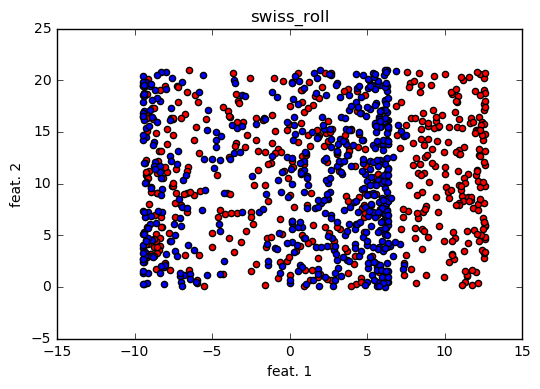

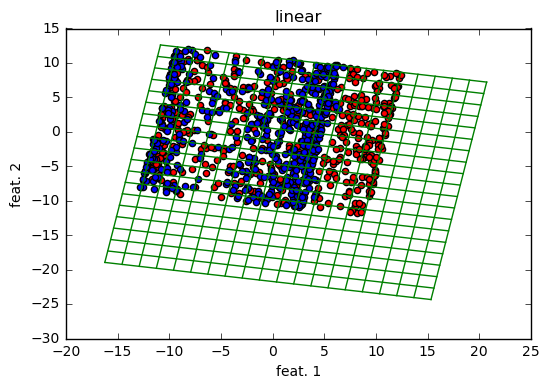

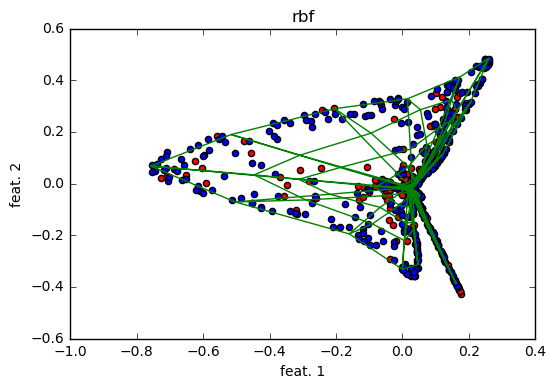

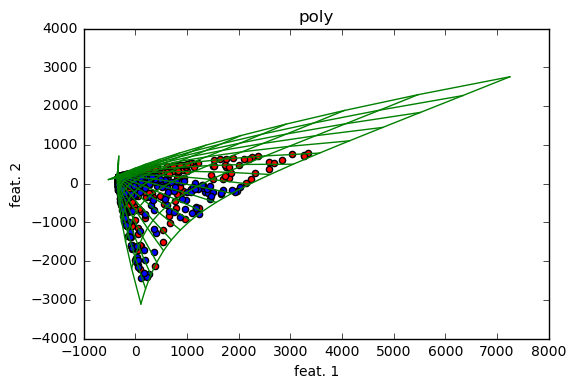

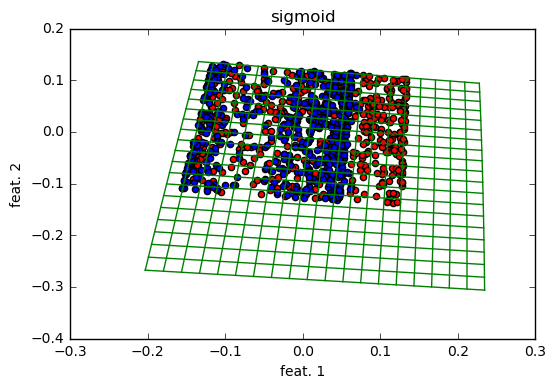

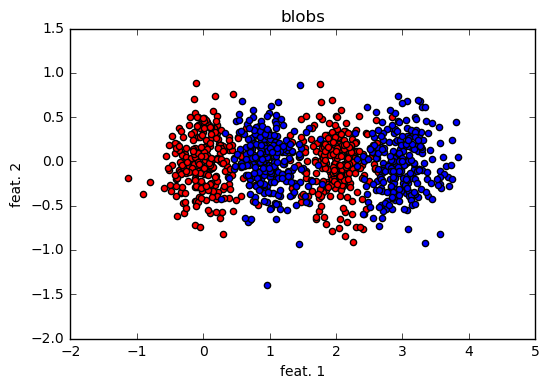

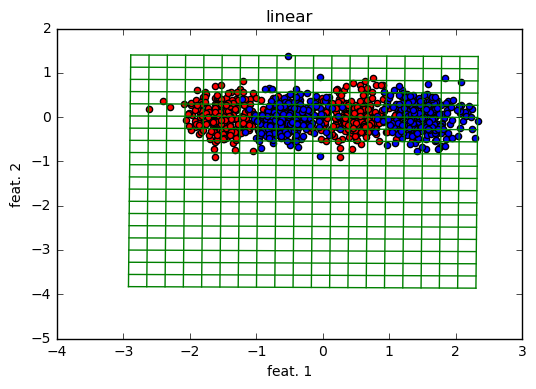

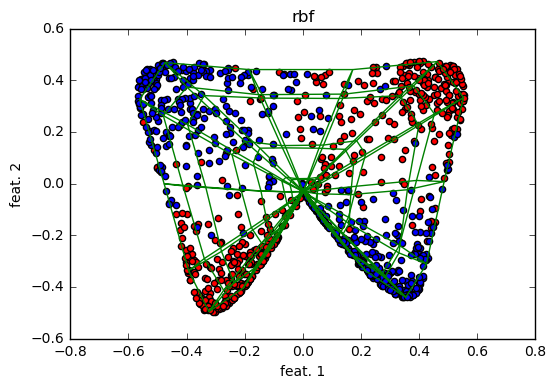

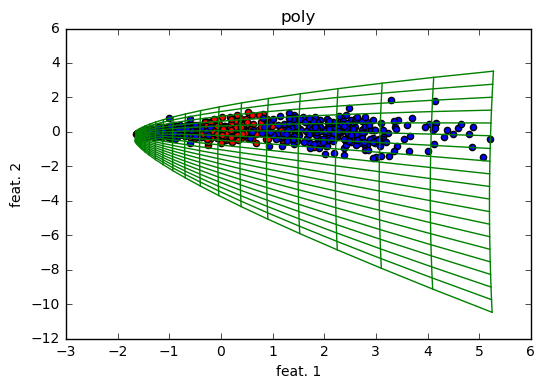

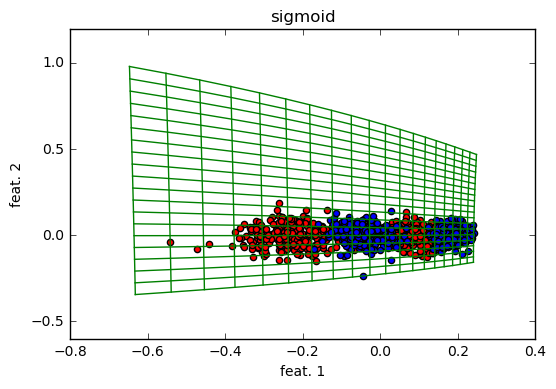

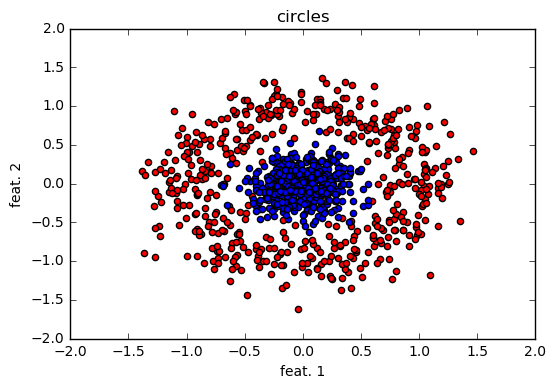

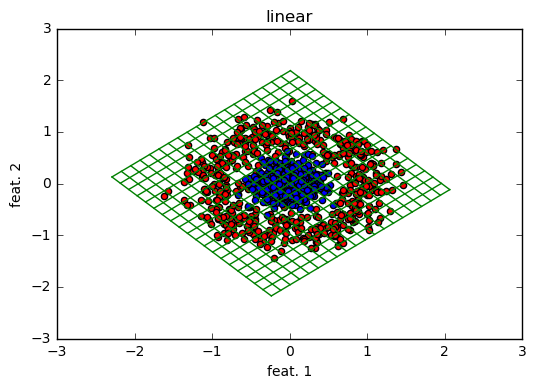

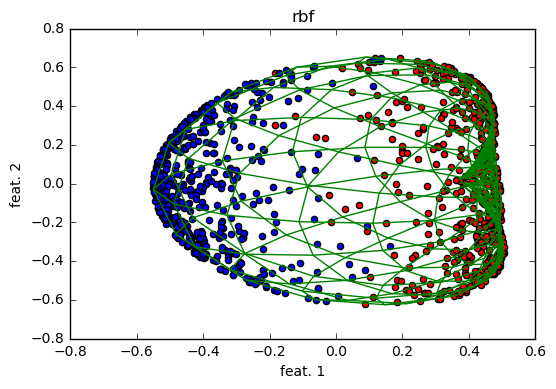

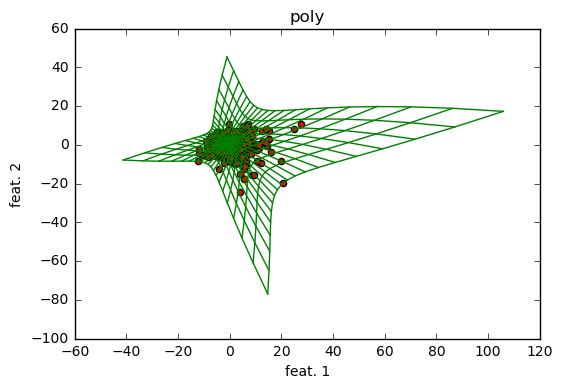

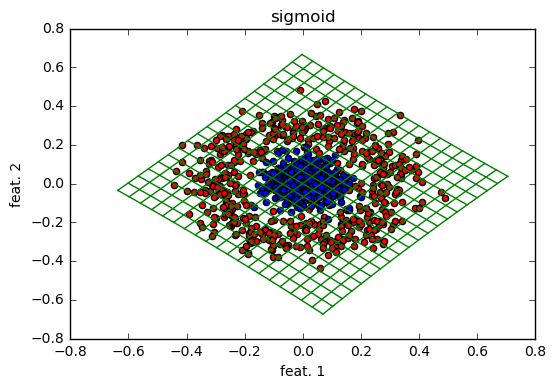

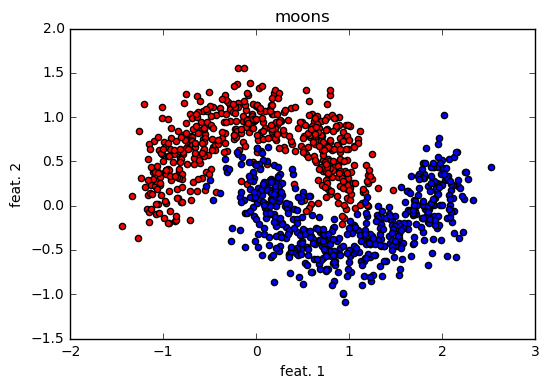

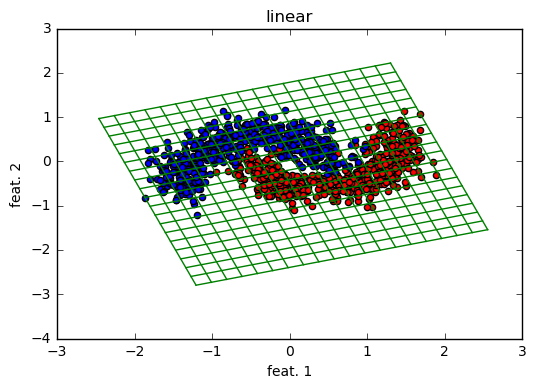

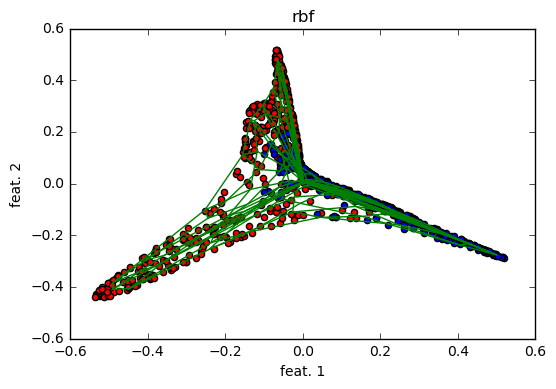

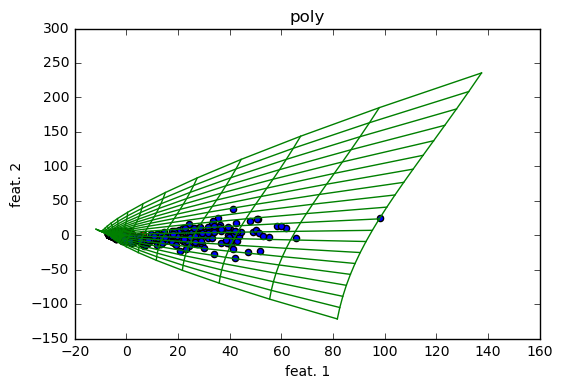

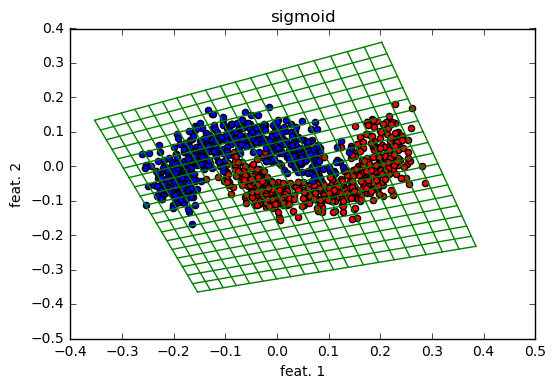

In [2]:
# Use the gammas for which the classification was the best
# to visualize the KPCA projections of the datasets
kernel_opts = {'kernel': '', 'degree': 5}
for key, value in datasets.items(): 
    x, y = value
        
    fig = plt.figure()
    ax = scatter_plotDataset(fig,x[:,0:2],y)
    ax.set_title(key)
        
    for idx_kernel, cKernel in enumerate(kernels): 
        gammas = np.linspace(gamma_ranges[key][cKernel][0],
                             gamma_ranges[key][cKernel][1],
                             num=n_eval)
        
        idx_gamma = np.argmax(scores_overall[key][idx_kernel])        
        c_gamma = gammas[idx_gamma]
        print('Dataset: %s, Kernel: %s, Best Gamma Value: %.3f, accuracy: %.3f' % 
              (key,cKernel,c_gamma,np.max(scores_overall[key][idx_kernel])))
        kernel_opts['kernel'] = cKernel
        kernel_opts['gamma'] = c_gamma
        kpca = KernelPCA(**kernel_opts)
        x_kpca = kpca.fit_transform(x[:,0:2])
        x_kpca = x_kpca[:,0:2]

        fig = plt.figure()
        ax = scatter_plotDataset(fig,x_kpca,y)
        ax.set_title(cKernel)

        ngrid = 20
        xgrid = np.linspace(np.min(x[:]),np.max(x[:]),num=ngrid)
        ygrid = np.linspace(np.min(x[:]),np.max(x[:]),num=ngrid)

        for idx in range(ngrid):
            line = np.concatenate((np.atleast_2d(np.tile(xgrid[idx],ngrid)),
                                   np.atleast_2d(ygrid)),axis=0).T
            line = kpca.transform(line)
            line = line[:,0:2]
            ax.plot(line[:,0],line[:,1],c='g')

        for idx in range(ngrid):
            line = np.concatenate((np.atleast_2d(ygrid),                       
                                   np.atleast_2d(np.tile(xgrid[idx],ngrid))),axis=0).T
            line = kpca.transform(line)
            line = line[:,0:2]
            ax.plot(line[:,0],line[:,1],c='g')
    


__BONUS__: Scikit learn provides a method to automatically perform a grid search and find the optimal parameters for a given kernel when training a SVM. Find and use the mentioned method to find the optimal set of parameters for each of the Kernels and datasets. Are the $\gamma$ values the you found for __Q 7.2.1__  and __Q 7.2.2__  similar to the ones yield by the automatic grid search function provided by scikit learn?
